In [37]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.cross_validation  import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

df = pd.read_excel('scores.xlsx', engine='openpyxl')

kind = []
for item in df['Kind']:
    kind.append(item)

                   

In [38]:
df = df.drop(columns=['Kind'])

In [39]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [40]:
scaled_features

array([[ 1.33487329e+00,  6.50487394e-02,  8.39228001e-01,
         1.43585481e-01, -2.14848679e-01, -1.31602580e+00,
         1.58786085e+00,  1.28770256e+00, -6.14545451e-01,
        -4.01571377e-01, -4.62233930e-02, -2.70823428e-01,
        -5.18537186e-01],
       [ 1.53641871e+00, -1.91429147e-01,  1.40021895e+00,
        -7.68938037e-01, -1.43418469e+00,  1.14476217e-01,
         1.39665248e+00,  1.61678211e+00, -9.17861876e-01,
        -4.01571377e-01, -5.15254881e-01, -2.16658743e-02,
         4.73882841e-02],
       [ 9.98964255e-01,  6.50487394e-02,  1.08855731e+00,
        -1.35556030e+00, -1.37000911e+00, -7.21110030e-02,
         1.20544410e+00,  1.61678211e+00, -7.35872021e-01,
        -4.01571377e-01,  4.75829046e-02, -6.86086019e-01,
        -7.07179009e-01],
       [ 1.33487329e+00, -8.32623865e-01,  1.08855731e+00,
        -6.38577535e-01, -3.43199837e-01, -3.83089703e-01,
         1.01423573e+00,  1.22188665e+00, -1.22117830e+00,
        -2.32617566e-01,  4.75829046e

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

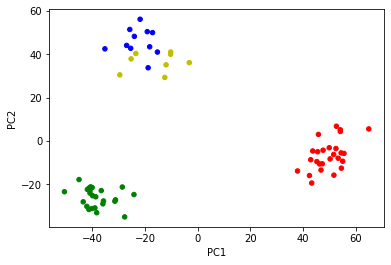

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
X_r = pca.fit(df).transform(df)

x = []
y = []
for item in X_r:
    x.append(item[0])
    y.append(item[1])

d = {'PC1': x, 'PC2': y, 'col3': kind}
df2 = pd.DataFrame(data=d)
#print(df2)

col = df2.col3.map({'WEN':'g', 'LI':'r', 'TI':'y', 'YI':'b'})
df2.plot.scatter(x='PC1', y='PC2', c=col)



<BarContainer object of 13 artists>

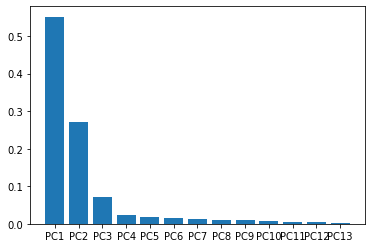

In [42]:
pc = []
variation = []
for i in range (1,14):
    pc.append("PC"+str(i))


plt.bar(pc,pca.explained_variance_ratio_)
